Importing Libraries also importing the Spotipy client API

In [25]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import json
import re 
import sys
import itertools
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import MinMaxScaler

Reading the dataset from csv files 

In [26]:
artist_data_df = pd.read_csv("data_by_artist.csv")
genre_data_df = pd.read_csv("data_by_genres.csv")
data_w_genre_df = pd.read_csv("data_w_genres.csv")
year_data_df = pd.read_csv("data_by_year.csv")
song_data_df = pd.read_csv("data.csv")

**Expolaratory data Analysis (EDA)**

**Genre-wise Feature Distribution**

In [40]:
top10_genres = genre_data_df.nlargest(30, 'popularity')

fig = px.bar(top10_genres, x='genres', y=['valence', 'energy', 'danceability', 'acousticness'], barmode='group')
fig.show()


c:\Users\irajn\anaconda3\lib\site-packages\plotly\express\_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



**Correlation Matrix of features**

In [34]:
meta_list = ['acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'valence']
filtered_data = year_data_df[meta_list]

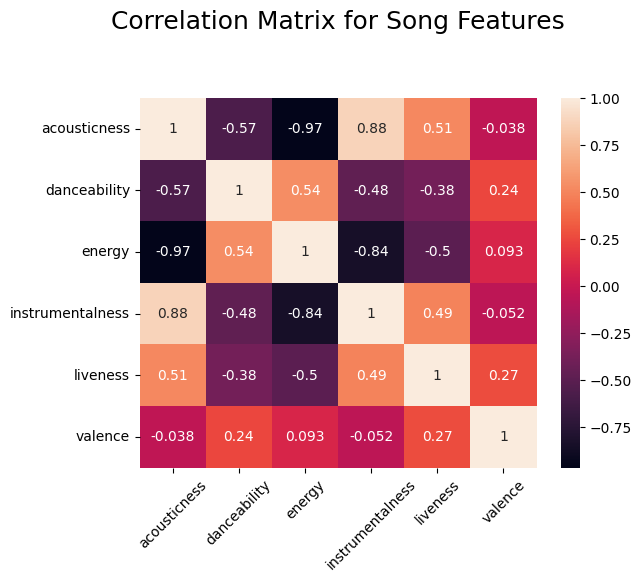

In [39]:
corr_matrix = filtered_data.corr()
plt.figure()  
sns.heatmap(
    corr_matrix,
    annot=True
)

plt.title('Correlation Matrix for Song Features', fontsize=18, pad=50)
plt.xticks(fontsize=10, rotation=45) 
plt.yticks(fontsize=10)
plt.show()

**Song Features trend and fluctuations throughout the years**

In [ ]:
corr_matrix = filtered_data.corr()

fig = px.line(year_data_df, x='year', y=meta_list)
fig.show()

We make a list of the Main_genres and create a new column in the dataset the sub-genres from the dataset(genre_data) based on the list gets added to the main-genres columns if their name contains the genre word if the word is not their we categorize them as other

In [33]:
genre_list = [
    "Pop", "Rock", "Indie", "Metal", "Classical", "Hip Hop", "Rap", "Folk", "Punk", "House", "Blues",
    "Soul", "Country", "Funk", "Reggae", "Techno", "Latin", "R&B", "Trance", "Ambient", "EDM",
    "Ska", "Gospel", "Disco", "Opera", "Grime", "Bass", "Drum"
]
def get_main_genre(genre):
    for element in genre_list:
        if element.lower() in genre:
            return element
    return "Other"
genre_data_df['Main_Genre']=genre_data_df['genres'].apply(get_main_genre)

**Main Genre Distribution**

In [36]:
filtered_df = genre_data_df[genre_data_df['Main_Genre'].isin(genre_list)]
category_counts = filtered_df['Main_Genre'].value_counts()

# Plotting
df = pd.DataFrame({'Category': category_counts.index, 'Count': category_counts.values})
fig = px.bar(df, x='Category', y='Count', title='Distribution of Categories in Categorical Column')
fig.update_xaxes(tickangle=45)  # Rotating the x-axis labels for better readability if necessary
fig.update_layout(xaxis_title='Category', yaxis_title='Count')
fig.show()

**Popularity distribution of genres** 
how are main genres are popular

In [37]:
sorted_df = genre_data_df[['Main_Genre', 'popularity']].sort_values(by='popularity', ascending=False)
fig = px.bar(sorted_df.head(50), x='Main_Genre', y='popularity', title='Genre by Popularity')
fig.show()